In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

path_to_directory = '/content/drive/MyDrive/Emotion Detection Image'

os.chdir(path_to_directory)

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("No GPU available. Switch to a GPU runtime in Google Colab.")

No GPU available. Switch to a GPU runtime in Google Colab.


In [ ]:
train_dir = '/content/drive/MyDrive/Emotion Detection Image'
test_dir = '/content/drive/MyDrive/Emotion Detection Image'
train_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
test_data_gen = ImageDataGenerator(rescale=1./255)
batch_size = 32
train_generator = train_data_gen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=batch_size, class_mode='binary')
test_generator = test_data_gen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=batch_size, class_mode='binary')

Found 4159 images belonging to 2 classes.
Found 4159 images belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

epochs = 10
history = model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=epochs, validation_data=test_generator, validation_steps=test_generator.samples // batch_size)

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 560s 4s/step - accuracy: 0.6902 - loss: 0.6331 - val_accuracy: 0.6841 - val_loss: 0.6264
Epoch 2/10
  1/129 ━━━━━━━━━━━━━━━━━━━━ 3:58 2s/step - accuracy: 0.7500 - loss: 0.5962

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


129/129 ━━━━━━━━━━━━━━━━━━━━ 84s 641ms/step - accuracy: 0.7500 - loss: 0.5962 - val_accuracy: 0.6834 - val_loss: 0.6271
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 381s 3s/step - accuracy: 0.6878 - loss: 0.6247 - val_accuracy: 0.6831 - val_loss: 0.6283
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 82s 631ms/step - accuracy: 0.8438 - loss: 0.5462 - val_accuracy: 0.6827 - val_loss: 0.6296
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 350s 3s/step - accuracy: 0.6847 - loss: 0.6310 - val_accuracy: 0.6829 - val_loss: 0.6257
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 71s 533ms/step - accuracy: 0.6562 - loss: 0.6502 - val_accuracy: 0.6836 - val_loss: 0.6250
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 370s 3s/step - accuracy: 0.6961 - loss: 0.6175 - val_accuracy: 0.6841 - val_loss: 0.6247
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 79s 609ms/step - accuracy: 0.7500 - loss: 0.5855 - val_accuracy: 0.6829 - val_loss: 0.6250
Epoch 9/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 361s 3s/step - accuracy: 0.6785 - loss: 0.6303 - val_accurac

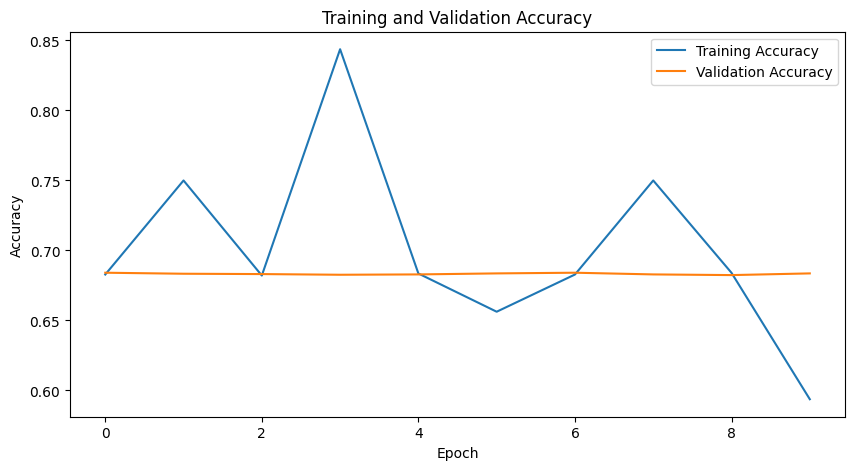

In [17]:
# Plot the accuracy graph
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 897ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 947ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/ste

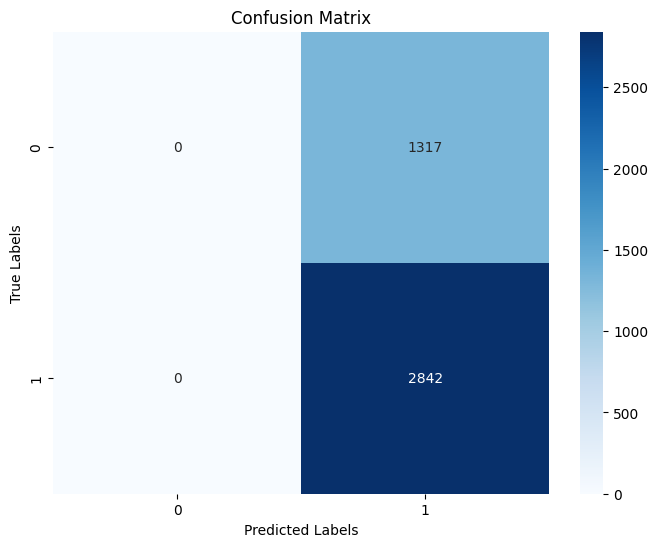

In [18]:
from sklearn.metrics import confusion_matrix

y_true = []
y_pred = []

for i in range(len(test_generator)):
    x_batch, y_batch = test_generator[i]
    y_true.extend(y_batch)
    y_pred_batch = model.predict(x_batch)
    y_pred.extend(np.round(y_pred_batch))

cm = confusion_matrix(y_true, y_pred)

#confusion matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Evaluating Metrices

TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

#accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

# mis-classification
conf_misclassification = 1- conf_accuracy

#sensitivity
conf_sensitivity = (TP / float(TP + FN))
#specificity
conf_specificity = (TN / float(TN + FP))

#precision
conf_precision = (TN / float(TN + FP))
#f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}')
print(f'Mis-Classification: {round(conf_misclassification,2)}')
print(f'Sensitivity: {round(conf_sensitivity,2)}')
print(f'Specificity: {round(conf_specificity,2)}')
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')